# Einfache Bild-Analyse mit Python

In [7]:
%pip install imageio.v2
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imageio.v2 (from versions: none)
ERROR: No matching distribution found for imageio.v2


Note: you may need to restart the kernel to use updated packages.


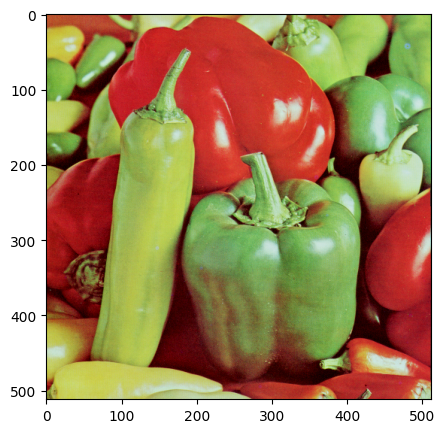

In [24]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
%matplotlib inline

img_path = "./img/peppers.png"

pic = imageio.imread(img_path)
plt.figure(figsize = (5,5))
plt.imshow(pic)

Warum dieses Bild?&nbsp; [[Fun Fact 1]](https://en.wikipedia.org/wiki/Lenna)&nbsp;&nbsp;  [[Fun Fact 2]](https://www.tandfonline.com/doi/full/10.1080/09500340.2016.1270881)

## Einfache Kennzahlen und Farben

In [25]:
print('Type of the image : ' , type(pic)) 
print('Shape of the image : {}'.format(pic.shape)) 
print('Image Hight {}'.format(pic.shape[0])) 
print('Image Width {}'.format(pic.shape[1])) 
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (512, 512, 4)
Image Hight 512
Image Width 512
Dimension of Image 3


Die Form des Ndarray zeigt, dass es sich um eine dreischichtige Matrix handelt. Die ersten beiden Zahlen hier sind Länge und Breite und die dritte Zahl (d. h. 3) steht für drei Schichten: Rot, Grün, Blau. Wenn wir also die Größe eines RGB-Bildes berechnen, wird die Gesamtgröße als Höhe x Breite x 3 gezählt

In [26]:
print('Image size {}'.format(pic.size)) 
print('Maximum RGB value in this image {}'.format(pic.max())) 
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 1048576
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [27]:
# A specific pixel located at Row : 100 ; Column : 50  
# Each channel's value of it, gradually R , G , B  
print('Value of only R channel {}'.format(pic[ 100, 50, 0])) 
print('Value of only G channel {}'.format(pic[ 100, 50, 1])) 
print('Value of only B channel {}'.format(pic[ 100, 50, 2]))

Value of only R channel 55
Value of only G channel 0
Value of only B channel 0


Jetzt werfen wir einen kurzen Blick auf jeden Kanal im Gesamtbild.

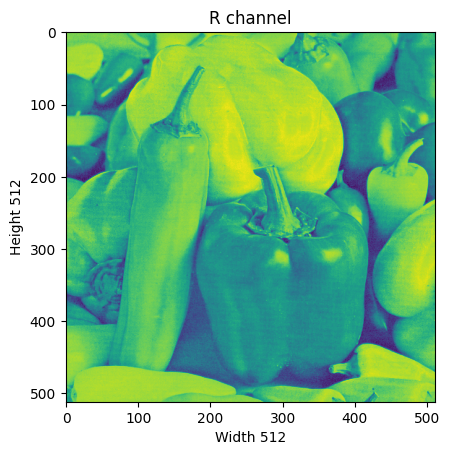

In [28]:
plt.title('R channel') 
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 0])
plt.show()

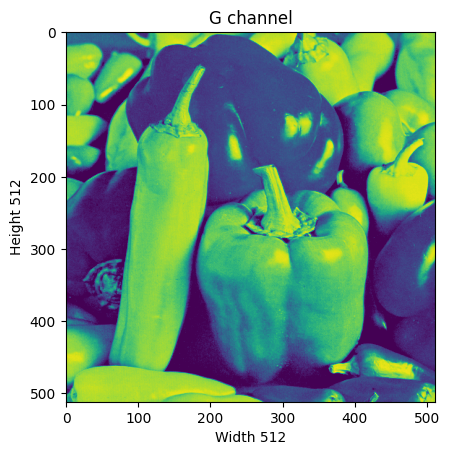

In [29]:
plt.title('G channel')
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 1]) 
plt.show()

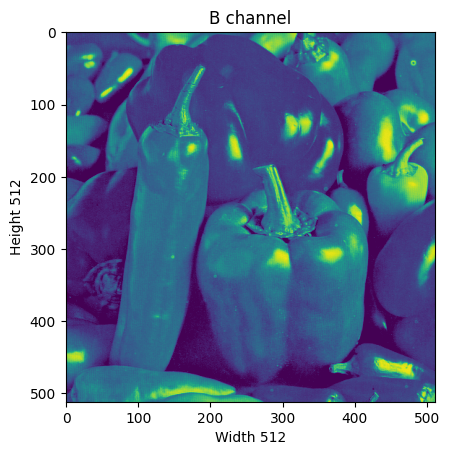

In [30]:
plt.title('B channel') 
plt.ylabel('Height {}'.format(pic.shape[0])) 
plt.xlabel('Width {}'.format(pic.shape[1])) 
plt.imshow(pic[ : , : , 2]) 
plt.show()

Lassen Sie uns nun die RGB-Werte selbst ändern. Als Beispiel stellen wir die Ebenen Rot, Grün und Blau für die folgenden Zeilenwerte auf volle Intensität ein.

* R-Kanal: Reihe – 100 bis 110
* G-Kanal: Reihe – 200 bis 210
* B-Kanal: Reihe – 300 bis 310

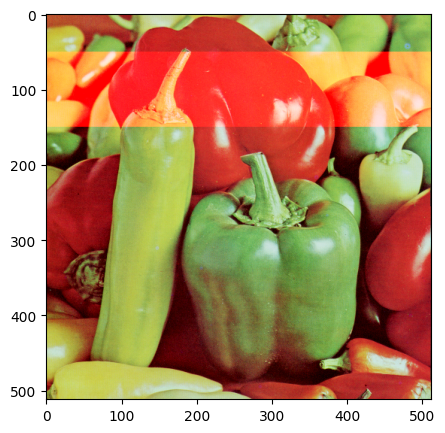

In [31]:
pic[50:150 , : , 0] = 255 # full intensity to those pixel's R channel 
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

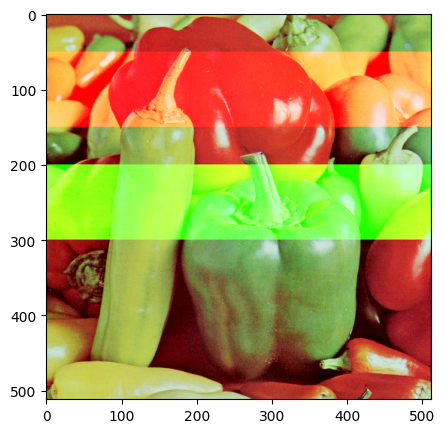

In [32]:
pic[200:300 , : , 1] = 255 # full intensity to those pixel's G channel 
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

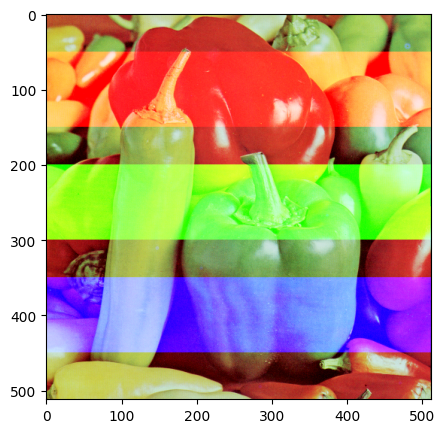

In [33]:
pic[350:450 , : , 2] = 255 # full intensity to those pixel's B channel 
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

Nun setzen wir noch in einer Spalte ALLE Werte - nicht auf volle Intensität, sondern auf einen festen Wert.

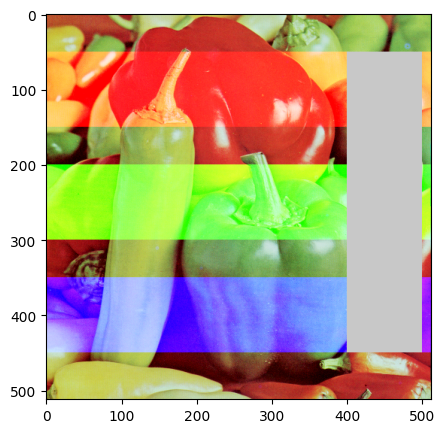

In [34]:
# set value 200 of all channels to those pixels which turns them to grey 
pic[ 50:450 , 400:500 , [0,1,2] ] = 200  
plt.figure( figsize = (5,5)) 
plt.imshow(pic) 
plt.show()

### Graustufen

Schwarzweißbilder werden in zweidimensionalen Arrays gespeichert. Es gibt zwei Arten von Schwarzweißbildern:
- Binär: Pixel ist entweder schwarz oder weiß: 0 oder 255
- Graustufen: Graustufenbereiche: 0 ~ 255

Bei der Grauskalierung handelt es sich um einen Prozess, bei dem ein Bild von einer Vollfarbe in Graustufen umgewandelt wird. In Bildverarbeitungstools wie OpenCV verwenden viele Funktionen Graustufenbilder vor der Verarbeitung. Dies geschieht, weil es das Bild vereinfacht und dabei fast wie eine Rauschunterdrückung wirkt.

Es gibt in Python mehrere Möglichkeiten, ein Bild in Graustufen umzuwandeln. Eine einfache Möglichkeit, Matplotlib zu verwenden, besteht jedoch darin, mithilfe dieser Formel den gewichteten Mittelwert des RGB-Werts des Originalbilds zu ermitteln:

$$Y = 0.299 R + 0.587 G + 0.114 B$$


Um diese mathematische Operation auszuführen, veralten wir das Bild als Numpy Array:

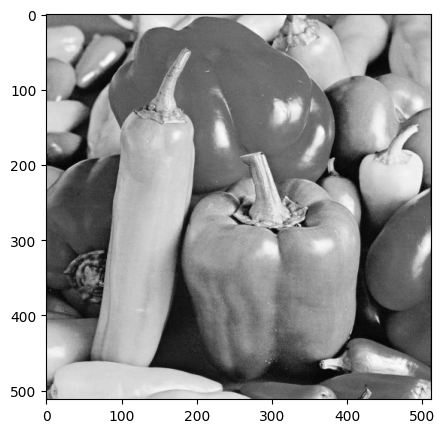

In [45]:
pic = imageio.imread(img_path) 
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])   
gray = gray(pic) 
plt.figure( figsize = (5,5))  
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray')) 
plt.show()

### Logik und Masken

Bei der Bildmaskierung handelt es sich um eine Bildverarbeitungstechnik, die dazu dient, den Hintergrund von Fotos zu entfernen, wenn dieser irrelevante oder störende Inhalte aufweist.

Hier erstellen wir eine Maske in Form einer kreisförmigen Scheibe. Zuerst messen wir den Abstand von der Bildmitte zu allen Randpixelwerten. Wir nehmen einen geeigneten Radiuswert und erstellen dann mithilfe eines logischen Operators eine kreisförmige Scheibe als Maske.

Beachten Sie, dass Sie derartige logische Operationen auch in Abhängigkeit von anderen Bedinungen wie Pixel-Nachbarschaften oder Werten in anderen Bildern vornehmen können.

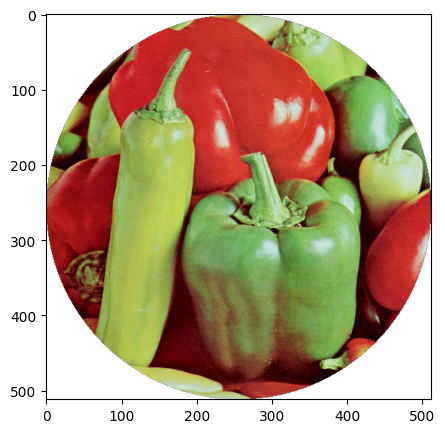

In [51]:
# Load the image 
pic = imageio.imread(img_path)  
# seperate the row and column values  
total_row , total_col , layers = pic.shape  

# create vector
x , y = np.ogrid[:total_row , :total_col]  

# get the center values of the image 
cen_x , cen_y = total_row/2 , total_col/2  


# Measure distance value from center to each border pixel.     
#To make it easy, we can think it's like, we draw a line from center-   
#to each edge pixel value --> s**2 = (Y-y)**2 + (X-x)**2  
distance_from_the_center = np.sqrt((x-cen_x)**2 + (y-cen_y)**2)  

# Select convenient radius value 
radius = (total_row/2)  

# Using logical operator '>'  
# logical operator to do this task which will return as a value  
# of True for all the index according to the given condition 
circular_pic = distance_from_the_center > radius  

# assign  zero for all pixel value that outside the cirular disc. 
# All the pixel value outside the circular disc, will be black now. 
pic[circular_pic] = 0
plt.figure(figsize = (5,5)) 
plt.imshow(pic)  
plt.show()